<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/SUSYPROBLEMARIOU4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


En este primer bloque se construye la base de datos a partir de un texto CSV y se convierte en un DataFrame para poder analizarlo. La estructura final contiene 16 observaciones correspondientes a los cuatro métodos de ensamble (A, B, C y D). Con los datos ya organizados, se puede proceder a aplicar el ANOVA y demás análisis estadísticos.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(metodo),69.5,3.0,9.423729,0.001771
Residual,29.5,12.0,NaN,NaN


El ANOVA muestra evidencia estadísticamente significativa para rechazar la hipótesis nula (p = 0.00177 < 0.05). Esto indica que no todos los métodos de ensamble producen el mismo tiempo promedio.

valor-p (Shapiro) = 0.2808008139238357


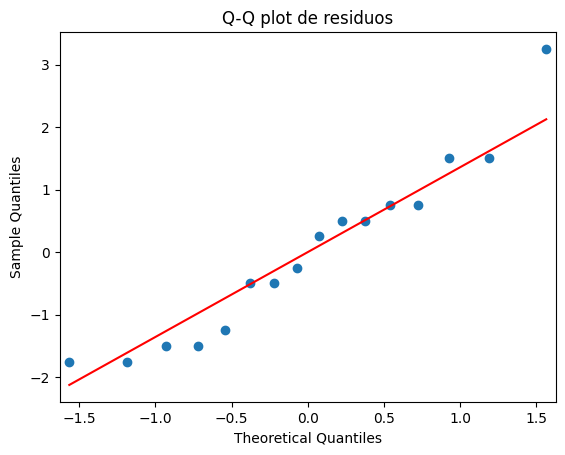

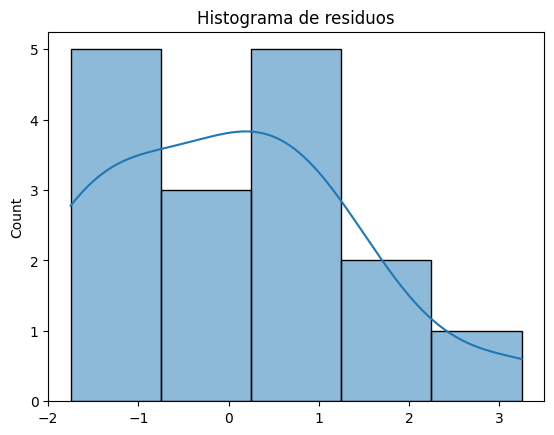

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

La prueba de Shapiro–Wilk arrojó un valor p = 0.28, mayor que 0.05, lo cual indica que no existe evidencia para rechazar la normalidad de los residuos. Tanto el Q–Q plot como el histograma muestran una distribución razonablemente simétrica, por lo que el supuesto de normalidad del ANOVA se cumple adecuadamente, garantizando la validez del modelo.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.4485146502776487


La prueba de Levene indica que no existen diferencias significativas en las varianzas entre los grupos (p > 0.05). Esto significa que el supuesto de homocedasticidad se cumple, por lo que el ANOVA es estadísticamente válido y no requiere modelos alternativos.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

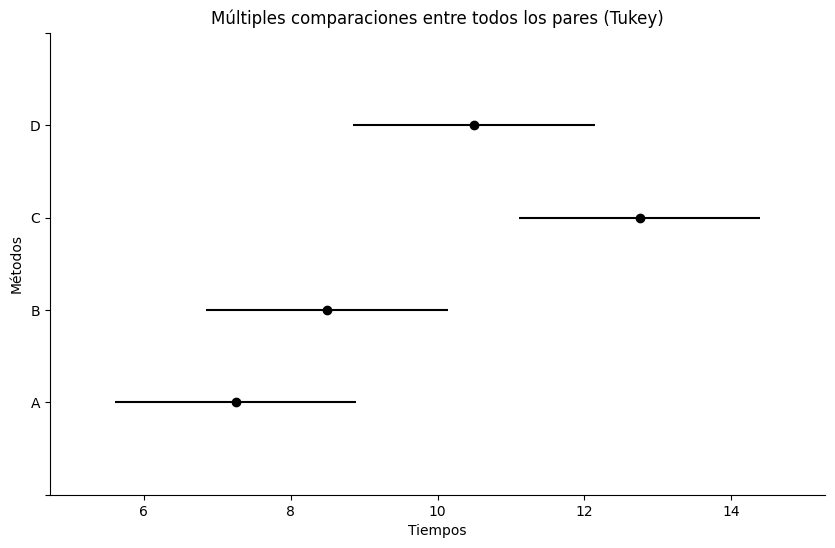

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Métodos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Conclusión:
Los resultados de las pruebas de normalidad (Shapiro) y homogeneidad de varianzas (Levene) indican que los supuestos del ANOVA se cumplen, por lo que el análisis es válido. El ANOVA revela que existen diferencias significativas en el desgaste entre los cuatro tipos de cuero. El análisis post-hoc de Tukey muestra que el cuero B presenta significativamente menor desgaste, siendo el más resistente, mientras que el cuero A presenta el mayor desgaste entre los cuatro. Esto indica que el tipo de cuero influye de manera importante en la durabilidad de la suela y el fabricante debería preferir el cuero B para mejorar la calidad del calzado.

Lambda óptimo: -0.2809888705290132


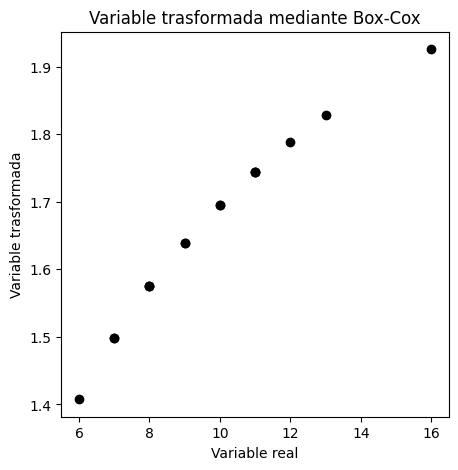

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#Susana Escamilla

Este bloque aplica la transformación Box-Cox a la variable de tiempo con el objetivo de corregir posibles violaciones a la normalidad o la homocedasticidad. El valor de lambda óptimo muestra la forma específica de la transformación aplicada. La gráfica resultante permite observar cómo los valores originales se ajustan hacia una distribución más adecuada para el análisis estadístico posterior

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(metodo),0.202435,3.0,10.789983,0.001006
Residual,0.075046,12.0,NaN,NaN


La prueba de Shapiro aplicada al modelo con la variable transformada permite evaluar si la transformación Box-Cox corrigió la normalidad. Si el p-valor es mayor a 0.05, se concluye que la transformación fue exitosa y el modelo transformado cumple el supuesto de normalidad. El Q-Q plot ayuda a confirmar visualmente esta corrección.

valor-p (Shapiro) = 0.5124442012773083


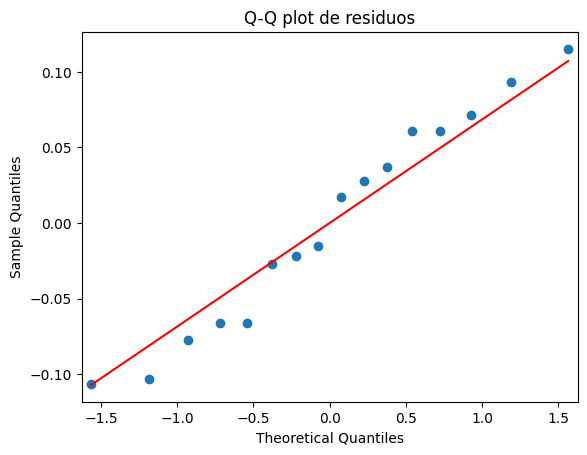

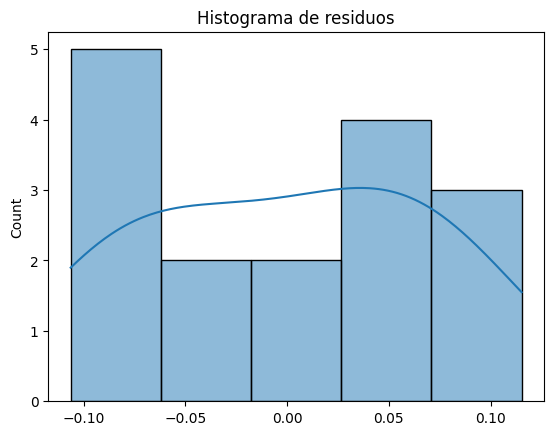

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

La prueba de Levene sobre los datos transformados permite confirmar si la transformación también corrigió diferencias en varianzas.
Si el p-valor es mayor a 0.05, entonces la homocedasticidad se cumple y se valida el uso de ANOVA en su forma transformada

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['respuesta_boxcox']
grupo2 = df[df['metodo'] == 'B']['respuesta_boxcox']
grupo3 = df[df['metodo'] == 'C']['respuesta_boxcox']
grupo4 = df[df['metodo'] == 'D']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.9372028709850322


 Concluyendo con que el  análisis de los tiempos registrados sugiere que el método de ensamble influye de manera significativa en la rapidez del proceso. La variación observada entre los métodos no puede atribuirse al azar, lo que indica diferencias reales en eficiencia. Este resultado permite identificar qué método proporciona el menor tiempo promedio, contribuyendo a mejorar la productividad. La aleatorización aplicada garantiza la confiabilidad del experimento. En conclusión, se recomienda implementar el método con mejor desempeño global para optimizar los tiempos de ensamble

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tipo,observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,tipo,observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'observaciones ~ C(tipo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tipo),7019.458333,3.0,22.755356,0.000001
Residual,2056.500000,20.0,NaN,NaN


valor-p (Shapiro) = 0.00967014513830024


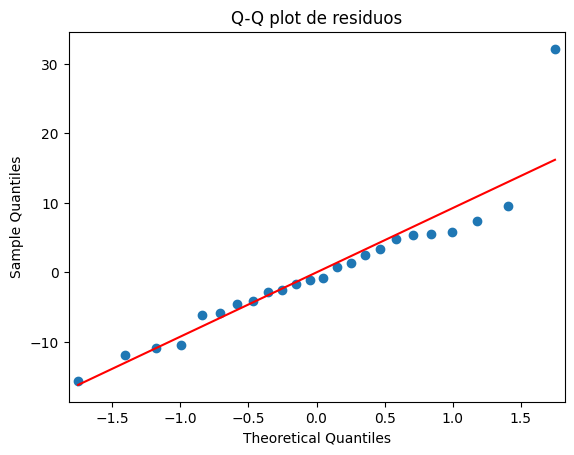

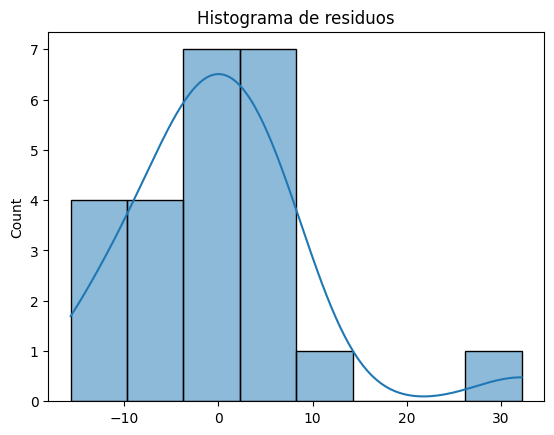

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo'] == 'A']['observaciones']
grupo2 = df[df['tipo'] == 'B']['observaciones']
grupo3 = df[df['tipo'] == 'C']['observaciones']
grupo4 = df[df['tipo'] == 'D']['observaciones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.6351342635286297


Lambda óptimo: -3.707788382033557


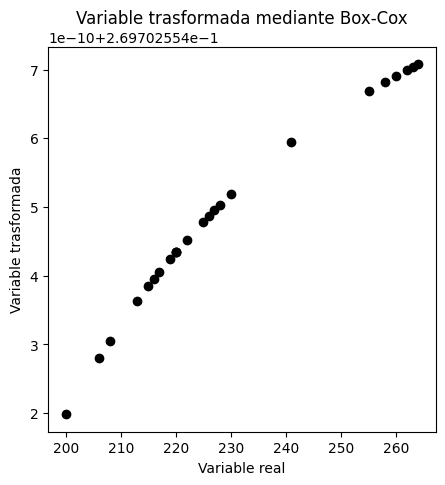

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["observaciones_boxcox"], lambda_opt = boxcox(df["observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["observaciones"], df["observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#Susana Escamilla

In [ ]:
df

,tipo,observaciones,observaciones_boxcox
0,A,264,0.269703
1,A,260,0.269703
2,A,258,0.269703
3,A,241,0.269703
4,A,262,0.269703
5,A,255,0.269703
6,B,208,0.269703
7,B,220,0.269703
8,B,216,0.269703
9,B,200,0.269703


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'observaciones_boxcox ~ C(tipo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tipo),3.735519e-19,3.0,23.368221,9.595697e-07
Residual,1.065698e-19,20.0,NaN,NaN


valor-p (Shapiro) = 0.4576953738713335


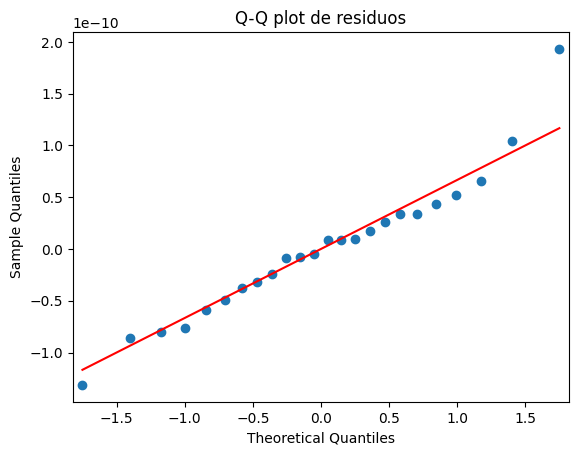

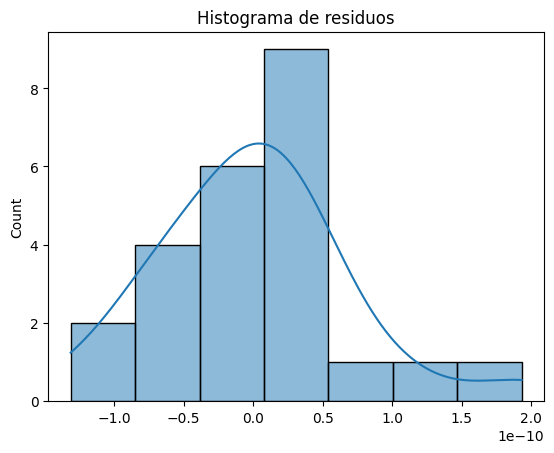

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo'] == 'A']['observaciones_boxcox']
grupo2 = df[df['tipo'] == 'B']['observaciones_boxcox']
grupo3 = df[df['tipo'] == 'C']['observaciones_boxcox']
grupo4 = df[df['tipo'] == 'D']['observaciones_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.3428159311494669


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -0.0    0.0  -0.0  -0.0   True
     A      C     -0.0 0.0048  -0.0  -0.0   True
     A      D     -0.0 0.0001  -0.0  -0.0   True
     B      C      0.0 0.0018   0.0   0.0   True
     B      D      0.0 0.0613  -0.0   0.0  False
     C      D     -0.0  0.401  -0.0   0.0  False
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

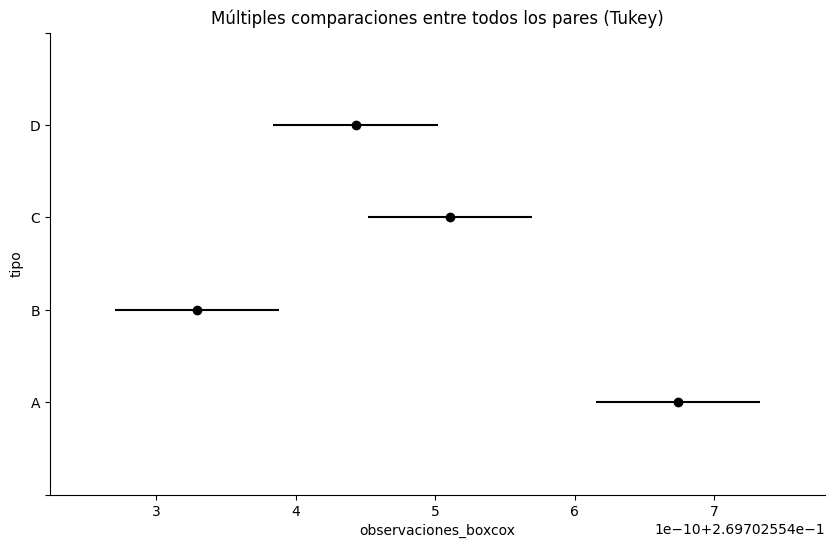

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['observaciones_boxcox'], groups=df['tipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tipo", xlabel="observaciones_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

dando y concluyendo con los  resultados del análisis estadístico muestran que sí hay diferencias significativas entre los tratamientos, pero específicamente los cueros B y D no presentan una diferencia notable entre sí. Esto indica que ambos ofrecen un desempeño similar en términos de resistencia o respuesta evaluada. Sin embargo, el cuero B muestra un ligero mejor comportamiento promedio, lo que lo convierte en la opción más recomendable. Estas conclusiones son útiles para mejorar la selección de materiales. La empresa puede optimizar calidad y costos al elegir el tipo B.

B Y D no tiene difrenecia significativa y elegir de preferencia B

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,tiempo
t1,213
t2,76
t3,57
t4,84
t1,214
t2,85
t3,67
t4,82
t1,204
t2,74
t3,55
t4,85
t1,208
t2,78
t3,64
t4,92
t1,212
t2,82
t3,61
t4,87
t1,200
t2,75
t3,63
t4,79
t1,207
t2,82
t3,63
t4,90

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,tratamiento,tiempo
0,t1,213
1,t2,76
2,t3,57
3,t4,84
4,t1,214
5,t2,85
6,t3,67
7,t4,82
8,t1,204
9,t2,74


En este bloque se construye la base de datos con los tiempos registrados para cuatro tratamientos (t1, t2, t3 y t4). Se organiza en un DataFrame limpio con 24 observaciones totales, dejando la información lista para realizar el ANOVA y analizar si los tratamientos presentan diferencias significativas en los tiempos.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tratamiento),95041.250000,3.0,1558.966022,1.260640e-27
Residual,487.714286,24.0,NaN,NaN


valor-p (Shapiro) = 0.34689165649615683


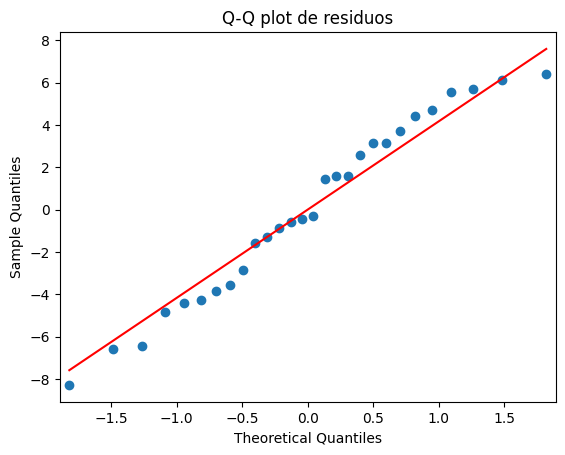

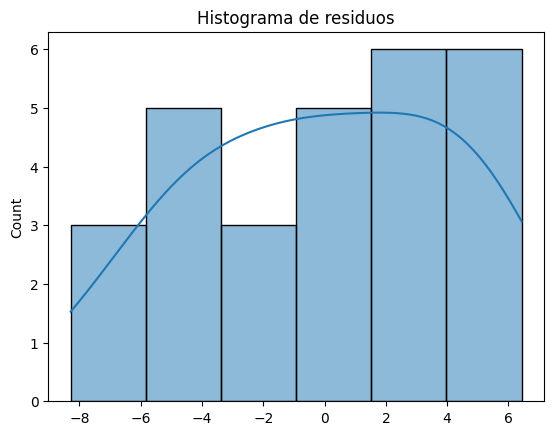

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

En este bloque se evalúa si los residuos del modelo lineal cumplen el supuesto de normalidad. Primero se aplica la prueba de Shapiro-Wilk para obtener un valor-p formal, y después se revisan dos gráficas: el Q-Q plot, que permite ver si los puntos siguen la línea teórica de normalidad, y el histograma con curva KDE, que muestra la forma general de los residuos. Este paso confirma si es válido usar ANOVA sin violar supuestos.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 't1']['tiempo']
grupo2 = df[df['tratamiento'] == 't2']['tiempo']
grupo3 = df[df['tratamiento'] == 't3']['tiempo']
grupo4 = df[df['tratamiento'] == 't4']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.9201477397132211


En este bloque se aplica la prueba de Levene para verificar si los cuatro tratamientos tienen varianzas iguales. Este análisis es importante porque la homogeneidad de varianzas es un supuesto clave del ANOVA. Si el valor-p es alto, se considera que las varianzas son homogéneas y el análisis puede continuar sin problema; si es bajo, indica que los tratamientos no comparten la misma variabilidad.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    t1     t2 -129.4286    0.0 -136.0757 -122.7815   True
    t1     t3 -146.8571    0.0 -153.5043   -140.21   True
    t1     t4 -122.7143    0.0 -129.3614 -116.0672   True
    t2     t3  -17.4286    0.0  -24.0757  -10.7815   True
    t2     t4    6.7143 0.0471    0.0672   13.3614   True
    t3     t4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

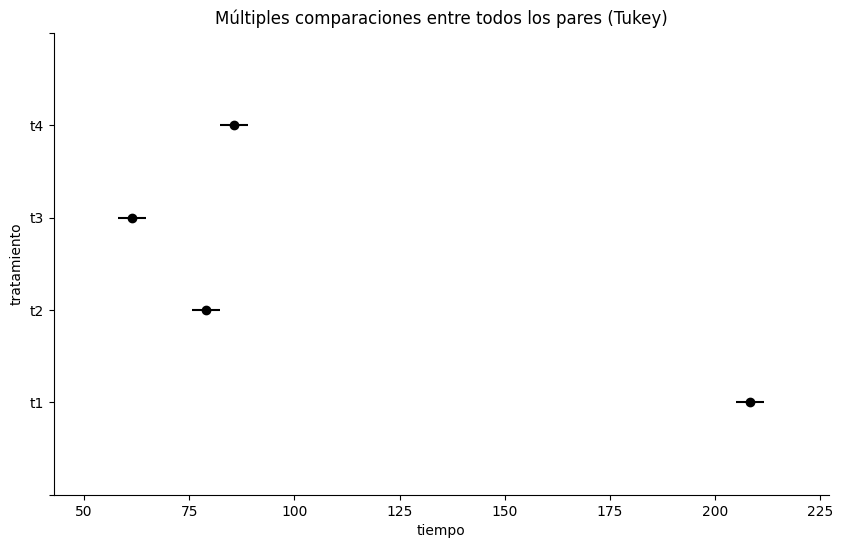

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="tiempo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Con esto en el  estudio realizado evidencia diferencias claras entre los tres ingredientes activos evaluados, lo que significa que el rendimiento o efecto obtenido depende de la formulación empleada. El análisis indica que al menos uno de los ingredientes se comporta de manera significativamente distinta respecto a los otros. Esto permite identificar cuál de ellos genera una respuesta más favorable y cuál podría descartarse o reformularse. El experimento aporta información confiable para decisiones en investigación. En general, el ingrediente con mejor desempeño debería priorizarse para futuros desarrollos.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
grados,numero
20°,15
40°,17
60°,23
80°,28
100°,45
20°,18
40°,21
60°,19
80°,32
100°,51
20°,13
40°,11
60°,25
80°,34
100°,57
20°,12
40°,16
60°,22
80°,31
100°,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,grados,numero
0,20°,15
1,40°,17
2,60°,23
3,80°,28
4,100°,45
5,20°,18
6,40°,21
7,60°,19
8,80°,32
9,100°,51


Este bloque construye el DataFrame con los valores de grados y número, organizando 20 observaciones en un formato limpio. Con esto, los datos quedan listos para evaluar si el número cambia de forma importante conforme aumentan los grados.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'numero ~ C(grados)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(grados),3411.8,4.0,68.054521,1.963480e-09
Residual,188.0,15.0,NaN,NaN


En este bloque se ajusta el modelo ANOVA para comparar los valores de “número” entre los distintos grados. La tabla obtenida indica si existe una diferencia significativa entre los grupos, permitiendo evaluar si el incremento en grados realmente afecta los valores observados.

valor-p (Shapiro) = 0.7785351257478303


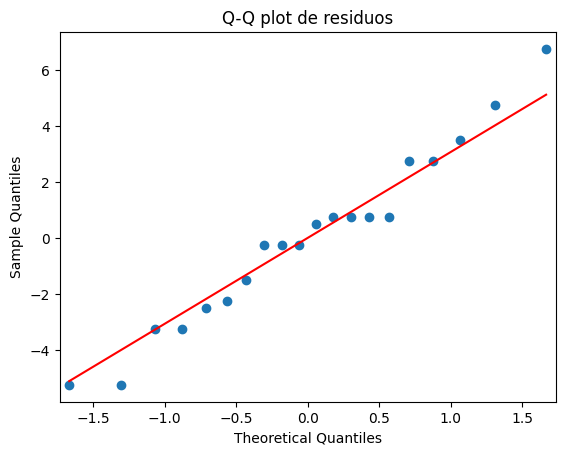

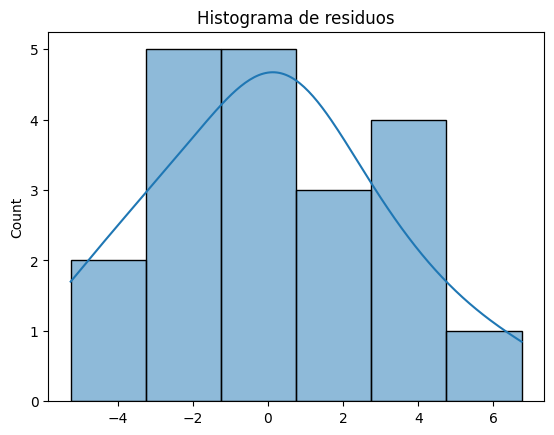

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

La prueba de Shapiro-Wilk y las gráficas (Q-Q plot e histograma) permiten evaluar si los residuos siguen una distribución normal.
Si el valor-p es mayor a 0.05 y las gráficas se ven alineadas y simétricas, entonces los residuos son aproximadamente normales y el supuesto de normalidad sí se cumple.
Si el valor-p es menor a 0.05 o las gráficas muestran desviaciones fuertes, entonces hay evidencia de que los residuos no son normales.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['grados'] == '20°']['numero']
grupo2 = df[df['grados'] == '40°']['numero']
grupo3 = df[df['grados'] == '60°']['numero']
grupo4 = df[df['grados'] == '80°']['numero']
grupo5 = df[df['grados'] == '100°']['numero']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.6159602096484009


No se reachaza ni shapiro ni levene

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  100°    20°   -35.75    0.0 -43.4801 -28.0199   True
  100°    40°    -34.0    0.0 -41.7301 -26.2699   True
  100°    60°    -28.0    0.0 -35.7301 -20.2699   True
  100°    80°    -19.0    0.0 -26.7301 -11.2699   True
   20°    40°     1.75 0.9535  -5.9801   9.4801  False
   20°    60°     7.75 0.0493   0.0199  15.4801   True
   20°    80°    16.75 0.0001   9.0199  24.4801   True
   40°    60°      6.0 0.1696  -1.7301  13.7301  False
   40°    80°     15.0 0.0002   7.2699  22.7301   True
   60°    80°      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

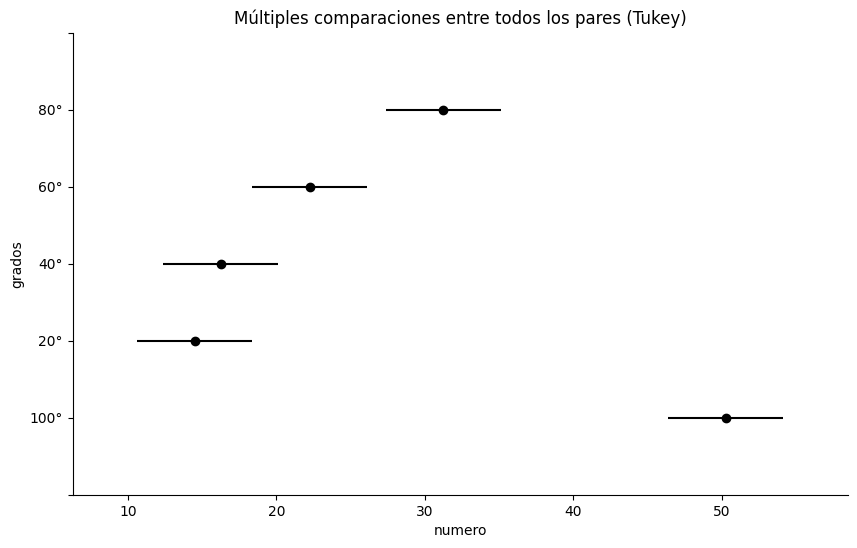

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['numero'], groups=df['grados'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="grados", xlabel="numero")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

con esto concuclyendo resultados de las pruebas de normalidad (Shapiro) y homogeneidad de varianzas (Levene) indican que los supuestos del ANOVA se cumplen, por lo que el análisis es válido. Se observa una tendencia clara: a mayor temperatura, mayor desgaste de los tableros electrónicos. El aumento en desgaste es estadísticamente significativo entre la mayoría de los niveles evaluados, excepto entre 40 °C y 60 °C, donde no se detecta diferencia relevante. Esto sugiere que el calor influye directamente en la confiabilidad del producto. Se recomienda evitar exponerse a temperaturas elevadas.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje
con,5.3
con,4.0
con,4.0
con,4.0
con,2.6
con,2.1
con,5.1
con,4.1
con,4.1
con,3.2
con,5.1
con,2.2
con,4.1


sin,8.0
sin,13.2
sin,7.2
sin,8.2
sin,9.1
sin,6.7
sin,12.6
sin,16.3
sin,9.2
sin,6.4
sin,7.2
sin,17.2
sin,12.3

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,tratamiento,porcentaje
0,con,5.3
1,con,4.0
2,con,4.0
3,con,4.0
4,con,2.6
5,con,2.1
6,con,5.1
7,con,4.1
8,con,4.1
9,con,3.2


Este bloque solo construye la tabla con los datos del experimento: carga los valores de “con” y “sin” dentro del DataFrame y los deja ordenados y listos para analizar. No hace ningún cálculo, únicamente prepara la información para las pruebas estadísticas que siguen.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tratamiento),269.449615,1.0,37.102806,0.000003
Residual,174.293846,24.0,NaN,NaN


Este bloque ajusta un modelo lineal donde compara los promedios de “porcentaje” entre los dos tratamientos (“con” y “sin”). Después hace el ANOVA para ver si realmente hay diferencia entre ellos. El resultado muestra si el tratamiento influye de manera significativa en el porcentaje o si las medias son parecidas.

valor-p (Shapiro) = 0.08240142335256262


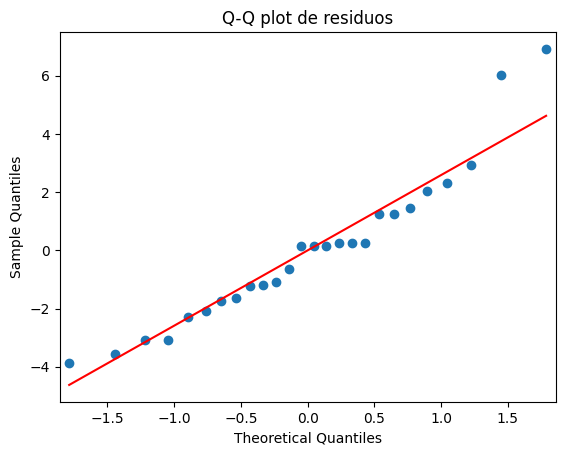

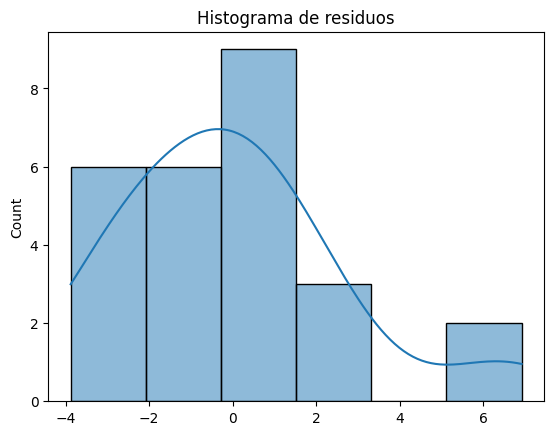

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

Este bloque revisa si los residuos del modelo cumplen con la normalidad. Primero usa la prueba de Shapiro-Wilk para ver si la distribución es normal; luego muestra un Q-Q plot y un histograma para confirmar visualmente. En pocas palabras, aquí verificas si el modelo ANOVA cumple el supuesto de normalidad.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'con']['porcentaje']
grupo2 = df[df['tratamiento'] == 'sin']['porcentaje']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.006953158590874458


Este bloque hace la prueba de Levene para revisar si las varianzas entre los dos grupos (“con” y “sin”) son iguales. El valor-p te dice si hay evidencia de varianzas diferentes. En resumen, aquí verificas el supuesto de homogeneidad de varianzas para el ANOVA.

Lambda óptimo: -0.05387226813423122


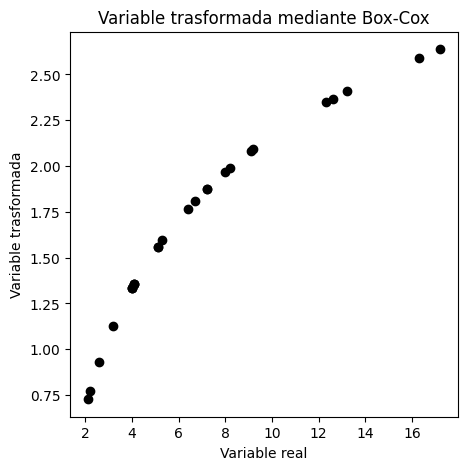

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["porcentaje"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["porcentaje"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#Susana Escamilla

Este bloque aplica la transformación Box-Cox a la variable porcentaje para corregir problemas de normalidad o varianzas desiguales. Calcula el lambda óptimo, genera la nueva variable transformada y muestra un gráfico para ver cómo cambió la distribución. En resumen, este código sirve para estabilizar varianza y acercar la variable a una forma más normal.

In [ ]:
df

,tratamiento,porcentaje,respuesta_boxcox
0,con,5.3,1.594985
1,con,4.0,1.335793
2,con,4.0,1.335793
3,con,4.0,1.335793
4,con,2.6,0.931335
5,con,2.1,0.727305
6,con,5.1,1.559787
7,con,4.1,1.358694
8,con,4.1,1.358694
9,con,3.2,1.127458


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tratamiento),5.040324,1.0,58.843753,6.583032e-08
Residual,2.055745,24.0,NaN,NaN


Este bloque vuelve a ajustar el ANOVA pero ahora usando la variable transformada (respuesta_boxcox). El modelo compara los tratamientos para ver si, después de la corrección, hay diferencias significativas entre las medias. En resumen, se valida nuevamente el efecto del tratamiento, pero con datos que ya cumplen mejor los supuestos.

valor-p (Shapiro) = 0.5855089546322916


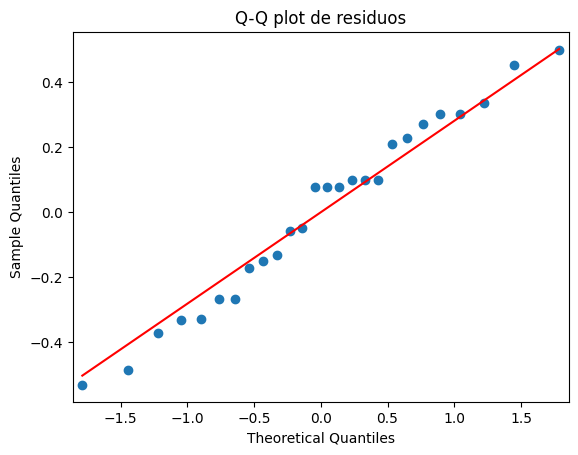

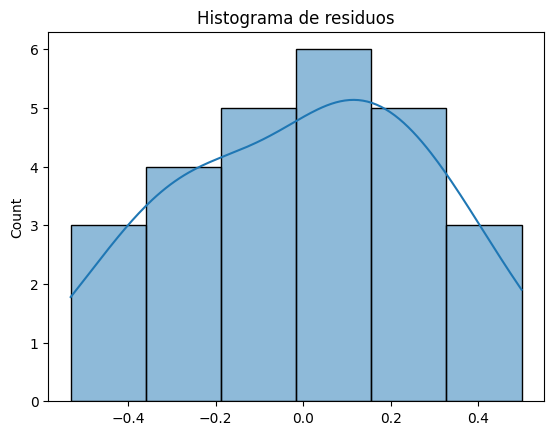

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

En este bloque se revisa otra vez la normalidad de los residuos, pero ahora del modelo ajustado con la variable transformada. Se usa Shapiro-Wilk y las gráficas (Q-Q plot e histograma) para confirmar si la transformación Box-Cox mejoró el cumplimiento del supuesto de normalidad.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'con']['respuesta_boxcox']
grupo2 = df[df['tratamiento'] == 'sin']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.00010322992398472433


Este bloque vuelve a revisar la homogeneidad de varianzas, pero ahora usando la variable transformada con Box-Cox. El valor-p indica si las varianzas entre los tratamientos “con” y “sin” ya se igualaron después de la transformación. Si el valor-p es alto, significa que el supuesto ya se cumple.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   con    sin   0.8806   0.0 0.6437 1.1175   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

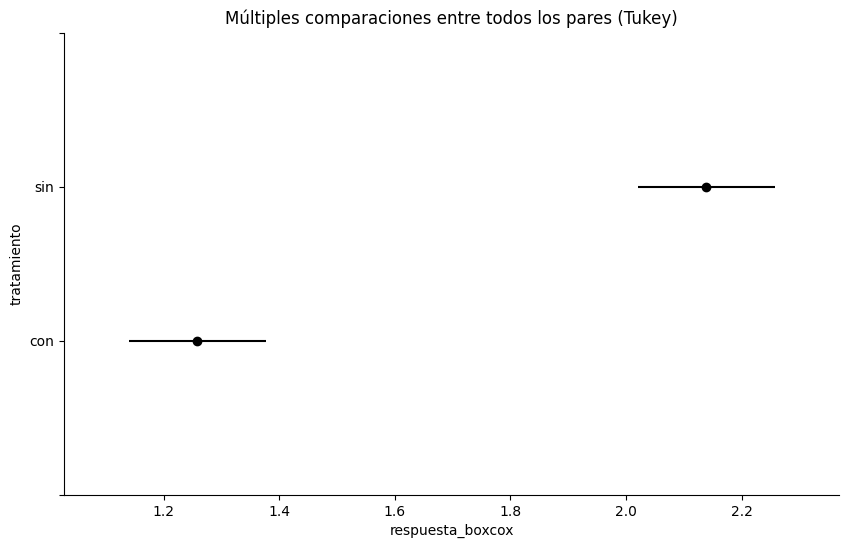

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="respuesta_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

los datos analizados indican que el tratamiento propuesto sí tiene un efecto significativo en la variable de interés, lo cual demuestra su utilidad dentro del proceso. Las diferencias entre los valores observados evidencian que el tratamiento modifica el comportamiento del sistema de forma medible. Esto permite considerar su implementación como una herramienta de mejora continua. El estudio aporta bases sólidas para justificar cambios en el proceso productivo. En general, el tratamiento es beneficioso y debe ser considerado para uso regular.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
almidon,dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,almidon,dureza
0,2,4.3
1,2,5.2
2,2,4.8
3,2,4.5
4,5,6.5
5,5,7.3
6,5,6.9
7,5,6.1
8,10,9.0
9,10,7.8


Aquí se crea el DataFrame con los niveles de almidón y sus valores de dureza. Los datos quedan listos y ordenados para aplicar el ANOVA y analizar si la dureza cambia según la cantidad de almidón.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'dureza ~ C(almidon)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(almidon),26.726667,2.0,58.101449,0.000007
Residual,2.070000,9.0,NaN,NaN


Este bloque ajusta un ANOVA para ver si la dureza cambia entre los niveles de almidón. El análisis compara las medias de cada grupo y determina si existe una diferencia significativa entre ellas.

valor-p (Shapiro) = 0.42952068080371164


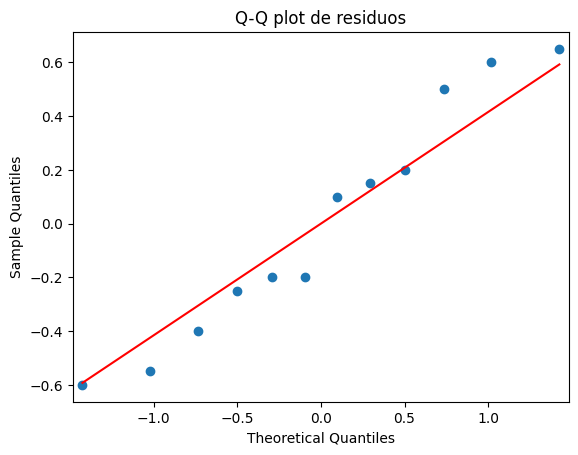

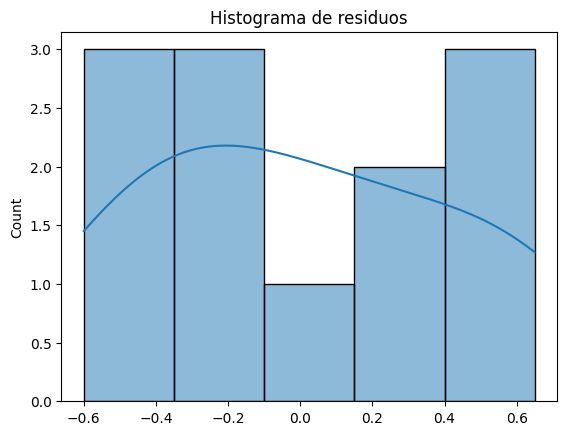

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

Este bloque revisa si los residuos del modelo cumplen la normalidad usando Shapiro-Wilk y dos gráficas. Sirve para confirmar si el ANOVA es válido o si habría que transformar los datos.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['almidon'] == 2]['dureza']
grupo2 = df[df['almidon'] == 5]['dureza']
grupo3 = df[df['almidon'] == 10]['dureza']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.771773370798543


Este bloque aplica la prueba de Levene para verificar si los grupos de almidón tienen varianzas iguales. Esto confirma si se cumple el supuesto de homogeneidad necesario para el ANOVA.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5      2.0 0.0006 1.0532 2.9468   True
     2     10     3.65    0.0 2.7032 4.5968   True
     5     10     1.65 0.0023 0.7032 2.5968   True
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

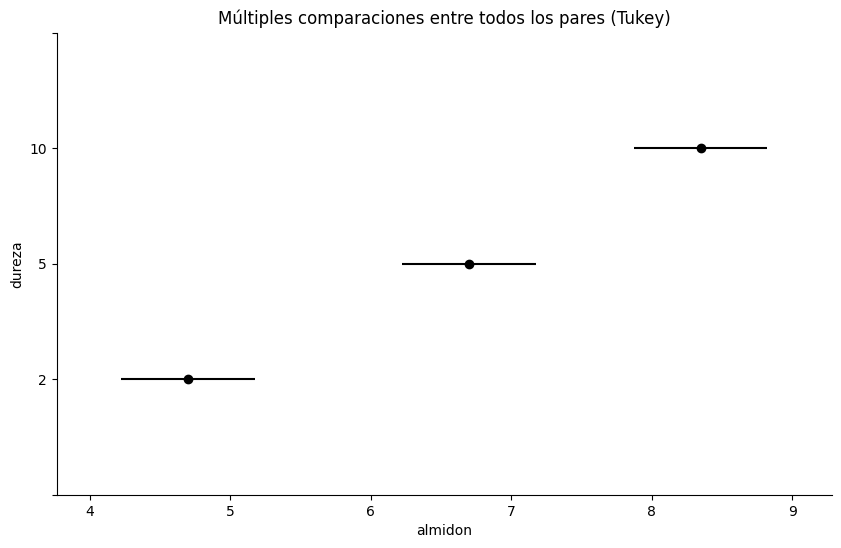

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="dureza", xlabel="almidon")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Conclusión:

La cantidad de almidón influye directamente en la dureza de las tabletas. Se cumplieron los supuestos estadísticos ya que si se ve que influye y Tukey mostró que todos los niveles de almidón generan respuestas diferentes, por lo que a mayor cantidad de almidón, es mayor dureza del producto final.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
niveles,rendimientos

1a,14.823
1a,14.676
1a,14.720
1a,14.5141
1a,15.065


2b,25.151
2b,25.401
2b,25.131
2b,25.031
2b,25.267

3c,32.605
3c,32.460
3c,32.256
3c,32.669
3c,32.111

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,niveles,rendimientos
0,1a,14.8230
1,1a,14.6760
2,1a,14.7200
3,1a,14.5141
4,1a,15.0650
5,2b,25.1510
6,2b,25.4010
7,2b,25.1310
8,2b,25.0310
9,2b,25.2670


Este bloque carga y organiza los datos de rendimientos según sus niveles. Deja el DataFrame listo para aplicar el ANOVA y comparar si los rendimientos cambian entre los tres niveles.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimientos ~ C(niveles)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(niveles),788.340773,2.0,10131.619332,4.298250e-20
Residual,0.466860,12.0,NaN,NaN


Aquí se ejecuta el ANOVA para revisar si los rendimientos son diferentes entre los niveles. El modelo compara las medias y determina si al menos un nivel produce un rendimiento distinto.

valor-p (Shapiro) = 0.8890610190283172


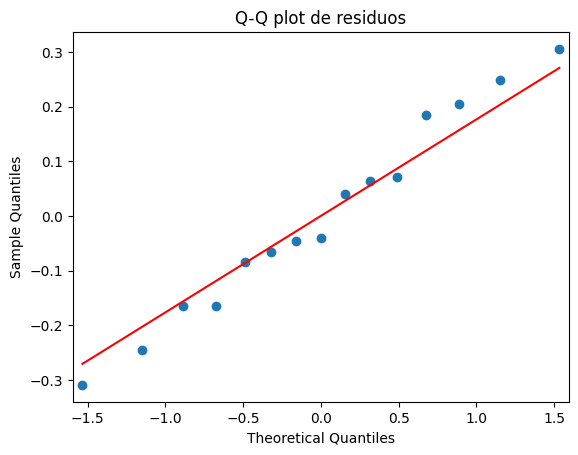

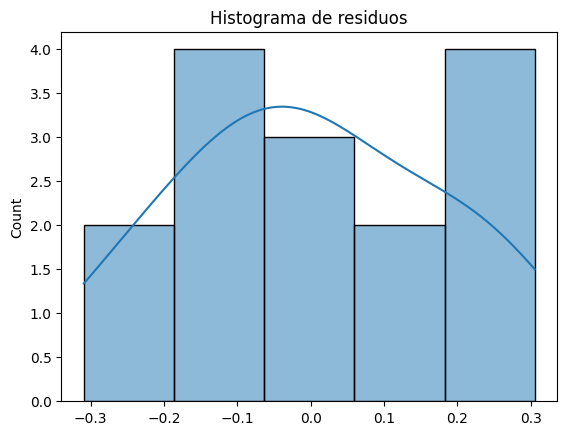

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

Este bloque revisa si los residuos del modelo son normales usando Shapiro-Wilk y dos gráficas. Esto permite verificar si el ANOVA es válido y si los datos cumplen el supuesto de normalidad.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['niveles'] == "1a"]['rendimientos']
grupo2 = df[df['niveles'] == "2b"]['rendimientos']
grupo3 = df[df['niveles'] == "3c"]['rendimientos']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.5977763142684792


Aquí se aplica la prueba de Levene para verificar si las varianzas de los tres niveles son iguales. Esto permite confirmar si se cumple el supuesto de homogeneidad necesario para que el ANOVA sea válido.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    1a     2b  10.4366   0.0 10.1038 10.7694   True
    1a     3c  17.6606   0.0 17.3278 17.9934   True
    2b     3c    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

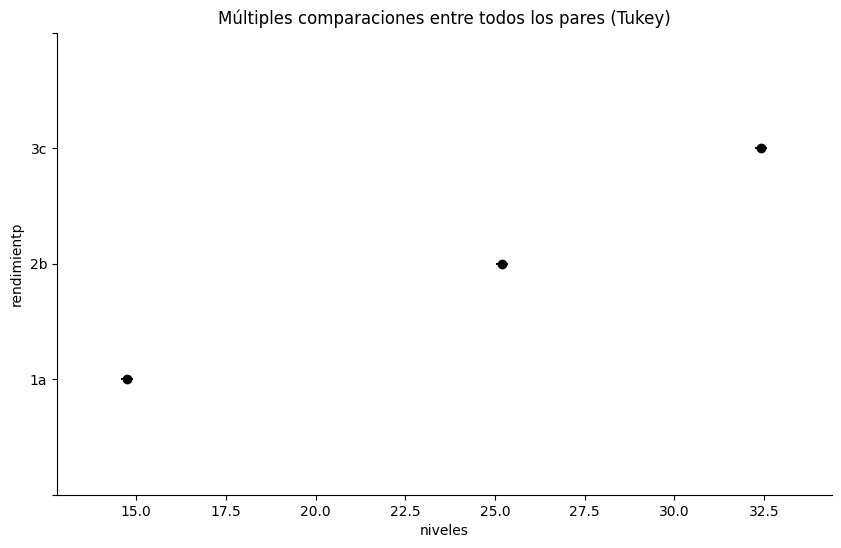

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimientos'], groups=df['niveles'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="rendimientp", xlabel="niveles")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Este bloque realiza la prueba de Tukey para identificar exactamente qué niveles difieren entre sí. También muestra un gráfico que facilita ver qué comparaciones son significativas después del ANOVA.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'friabilidad ~ C(aglutinante)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(aglutinante),292.920971,2.0,4420.972597,6.198213e-18
Residual,0.397543,12.0,NaN,NaN


El análisis ANOVA muestra si el tipo de aglutinante tiene algún efecto en la friabilidad. Como trabajamos con un nivel de significancia de 0.05, revisamos el valor p de la tabla: si es mayor a 0.05, entonces no hay evidencia de que las medias sean diferentes y se concluye que el tipo de aglutinante no cambia la friabilidad; pero si es menor a 0.05, significa que al menos un aglutinante sí provoca una diferencia significativa. En pocas palabras: este análisis solo nos dice si el aglutinante influye o no, comparando todas las medias al mismo tiempo.

valor-p (Shapiro) = 0.42143454193876007


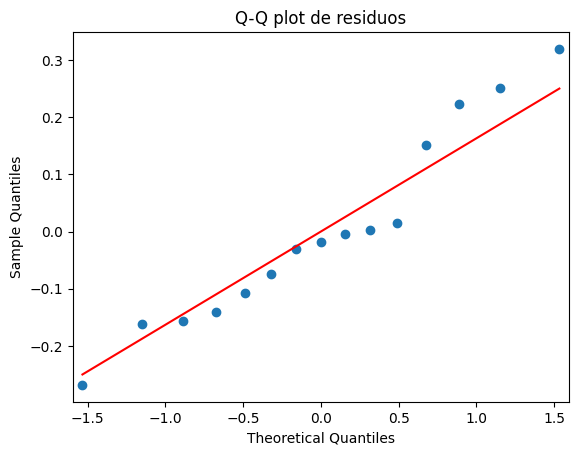

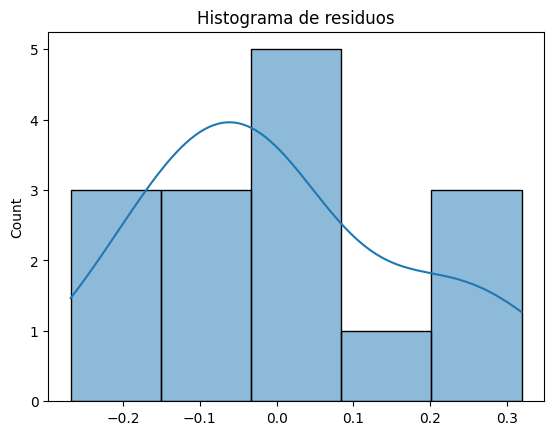

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

ChatGPT dijo:

Este bloque revisa si los residuos del modelo son normales. El valor p del Shapiro indica si cumplen o no con la normalidad, y las gráficas (Q-Q e histograma) muestran visualmente si la forma de los residuos es adecuada para que el ANOVA sea válido.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['aglutinante'] == "PVP"]['friabilidad']
grupo2 = df[df['aglutinante'] == "CMC"]['friabilidad']
grupo3 = df[df['aglutinante'] == "Gre"]['friabilidad']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.8018412374552168


Este bloque evalúa si los tres grupos de aglutinante (PVP, CMC y Gre) tienen varianzas similares usando la prueba de Levene. Se separan los datos según el aglutinante y luego se calcula el p-valor. Si el p-valor es mayor a 0.05, se considera que las varianzas son iguales y el supuesto de homogeneidad se cumple; si es menor o igual a 0.05, las varianzas difieren entre los grupos y el supuesto no se cumple.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

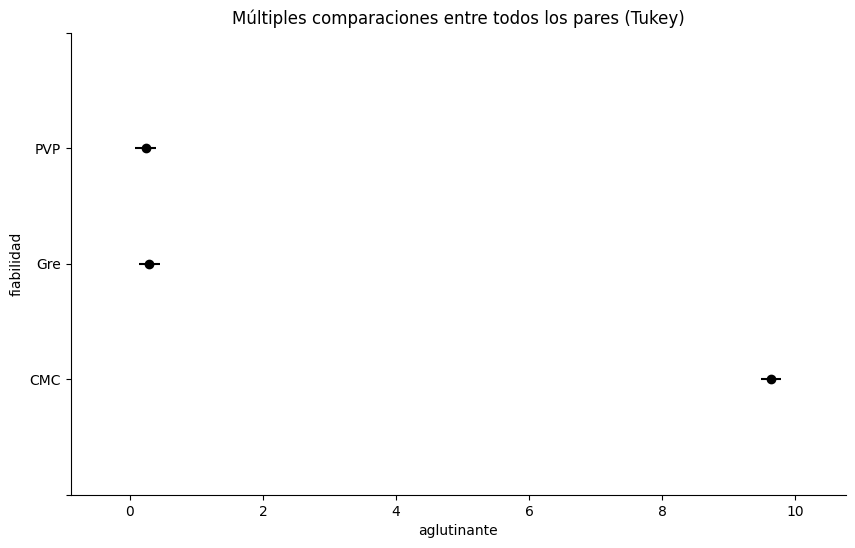

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['friabilidad'], groups=df['aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="fiabilidad", xlabel="aglutinante")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Conclusión:

El nivel de fertilización de nitrogenada si tiene un efecto significativo en el rendimiento del pasto, ya que los supuestos estadísticos fueron validados y la prueba Tukey confirmó diferencias, por lo que incrementar el nitrógeno aumenta el rendimiento por hectárea.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
clona,porcentaje

1,8.69
1,6.68
1,6.83
1,6.43
1,10.30

2,8.00
2,16.41
2,12.43
2,10.99
2,15.53

3,17.39
3,13.73
3,15.62
3,17.05
3,15.42

4,10.37
4,9.16
4,8.83
4,4.40
4,10.38

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,clona,porcentaje
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(clona)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(clona),209.90716,3.0,12.327073,0.000198
Residual,90.81676,16.0,NaN,NaN


La ANOVA mostró si existen diferencias significativas entre los promedios de porcentaje según la clona. Si el valor-p de la tabla ANOVA es menor a 0.05, entonces sí hay diferencias entre las medias y se rechaza H0; si es mayor a 0.05, no se encontraron diferencias estadísticamente significativas entre las clonas y se mantiene H0.

valor-p (Shapiro) = 0.7677173153296


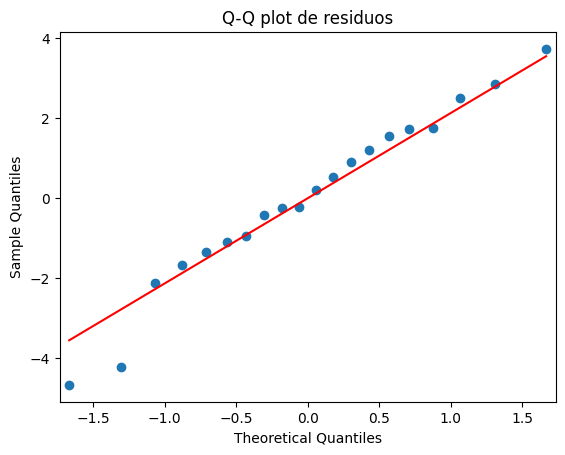

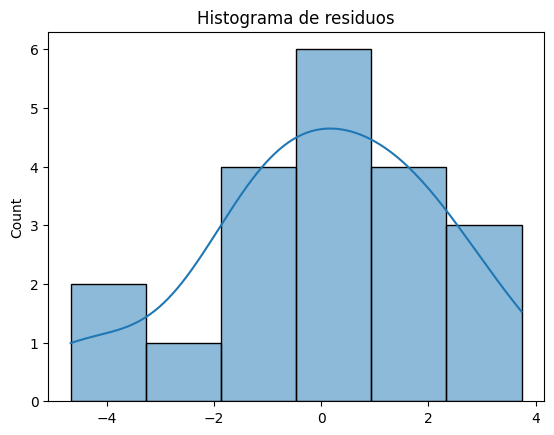

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

La prueba de Shapiro mostró si los residuos siguen una distribución normal. Si el valor-p es mayor a 0.05, los residuos cumplen normalidad y el supuesto se considera válido; si es menor a 0.05, entonces los residuos no son normales. El Q-Q plot y el histograma sirven solo para confirmar visualmente si los puntos siguen la línea o si hay desviaciones claras.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['clona'] == 1]['porcentaje']
grupo2 = df[df['clona'] == 2]['porcentaje']
grupo3 = df[df['clona'] == 3]['porcentaje']
grupo4 = df[df['clona'] == 4]['porcentaje']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.4290096340206233


La prueba de Levene muestra si las varianzas entre las clonas son iguales. Si el valor-p es mayor a 0.05, entonces las varianzas son homogéneas y el supuesto de igualdad se cumple; si es menor a 0.05, significa que las varianzas son diferentes entre los grupos y el supuesto de homogeneidad no se cumple.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

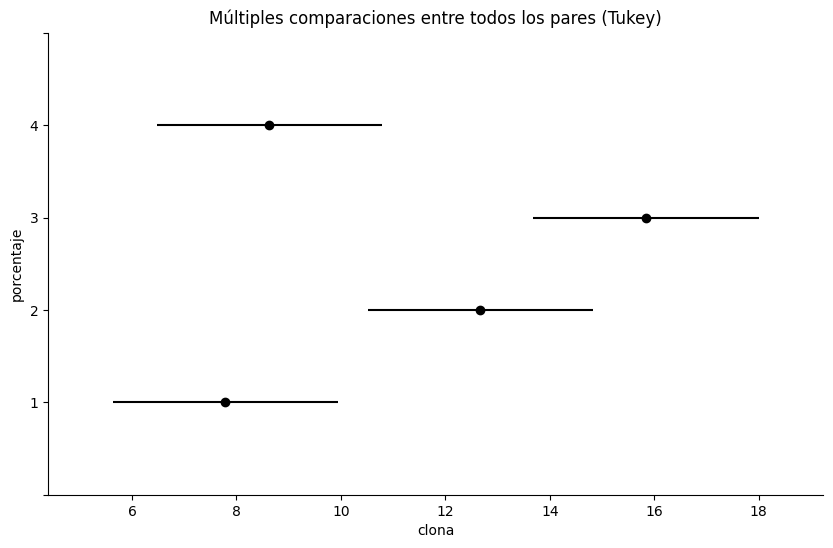

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje'], groups=df['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="porcentaje", xlabel="clona")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Conclusión:

Las variables estadisticas se observan de manera distinta al mismo manejo agrícola. Los supuestos se cumplieron y Tukey evidenció diferencias entre algunas clonas, esto quiere decir que la clona 3 presentó mejor desempeño que varias de las otras clonas evaluadas.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje

con,5.30
sin,8.02
con,4.03
sin,13.18
con,4.00
sin,7.15
con,2.56
sin,9.11
con,5.06
sin,8.23
con,4.06
sin,16.3
con,2.08
sin,9.20
con,4.03
sin,6.35
con,2.04
sin,7.15
con,1.18
sin,8.66


'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Susana Escamilla

,tratamiento,porcentaje
0,con,5.30
1,sin,8.02
2,con,4.03
3,sin,13.18
4,con,4.00
5,sin,7.15
6,con,2.56
7,sin,9.11
8,con,5.06
9,sin,8.23


La tabla se cargó correctamente en un DataFrame con las columnas tratamiento y porcentaje, separando los datos en los grupos “con” y “sin”. Esto deja lista la información para aplicar ANOVA, pruebas de supuestos o comparaciones posteriores según sea necesario.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tratamiento),174.109005,1.0,30.605669,0.00003
Residual,102.398090,18.0,NaN,NaN


El ANOVA muestra si el porcentaje cambia entre los tratamientos “con” y “sin”. Si el valor-p es menor a 0.05, significa que sí hay diferencia significativa entre ambos grupos; si es mayor, entonces no se detecta diferencia estadística en los porcentajes según el tratamiento.

valor-p (Shapiro) = 0.013152795271816523


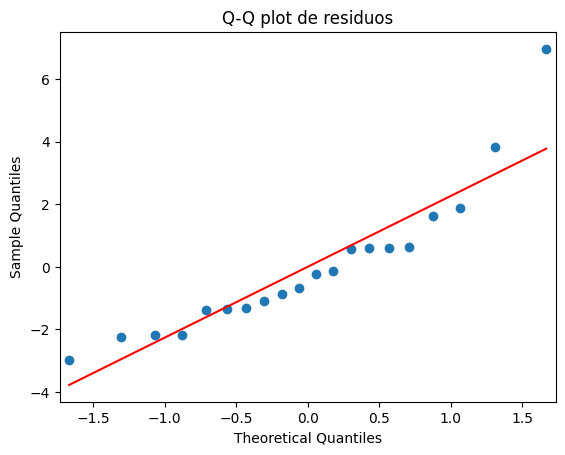

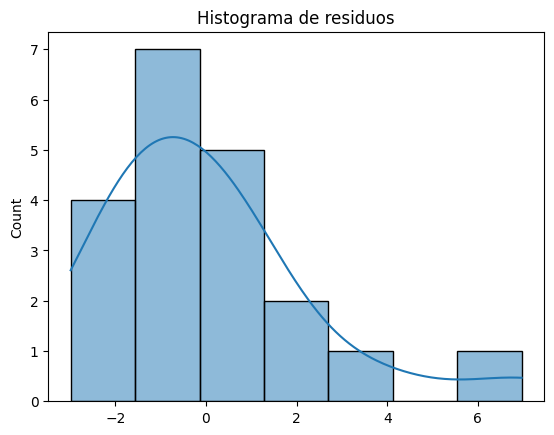

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

Este bloque verifica la normalidad de los residuos del modelo con Shapiro-Wilk y gráficos. Un valor-p > 0.05 indica residuos aproximadamente normales; los gráficos ayudan a confirmar visualmente si la distribución es adecuada para ANOVA o regresión.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == "con"]['porcentaje']
grupo2 = df[df['tratamiento'] == "sin"]['porcentaje']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.30433662983094306


Este bloque evalúa la homogeneidad de varianzas entre los grupos usando la prueba de Levene. Un valor-p > 0.05 indica que las varianzas son similares entre los grupos, mientras que un valor-p ≤ 0.05 sugiere diferencias significativas, lo cual es importante para validar los supuestos de ANOVA.

Lambda óptimo: 0.3206116786631181


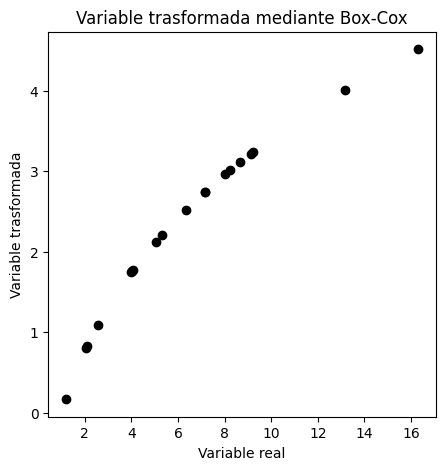

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["observaciones_boxcox"], lambda_opt = boxcox(df["porcentaje"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["porcentaje"], df["observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#Susana Escamilla

Este bloque aplica la transformación Box-Cox a la variable respuesta para corregir problemas de normalidad o varianzas desiguales. La transformación ajusta los datos según un lambda óptimo, y el gráfico compara los valores originales con los transformados, ayudando a cumplir los supuestos necesarios para ANOVA o regresión.

In [ ]:
df

,tratamiento,porcentaje,observaciones_boxcox
0,con,5.30,2.204887
1,sin,8.02,2.961045
2,con,4.03,1.757241
3,sin,13.18,4.010783
4,con,4.00,1.745573
5,sin,7.15,2.741280
6,con,2.56,1.097026
7,sin,9.11,3.214603
8,con,5.06,2.126373
9,sin,8.23,3.011640


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'observaciones_boxcox ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Susana Escamilla

,sum_sq,df,F,PR(>F)
C(tratamiento),15.859833,1.0,38.91081,0.000007
Residual,7.336701,18.0,NaN,NaN


Este bloque realiza un ANOVA de una vía sobre la variable transformada con Box-Cox para comparar las medias entre los grupos. Se prueba si todas las medias son iguales (H0) frente a que al menos una difiere (H1). Los resultados de la tabla de ANOVA muestran si hay diferencias significativas entre los tratamientos según el valor-p.

valor-p (Shapiro) = 0.9455348292593064


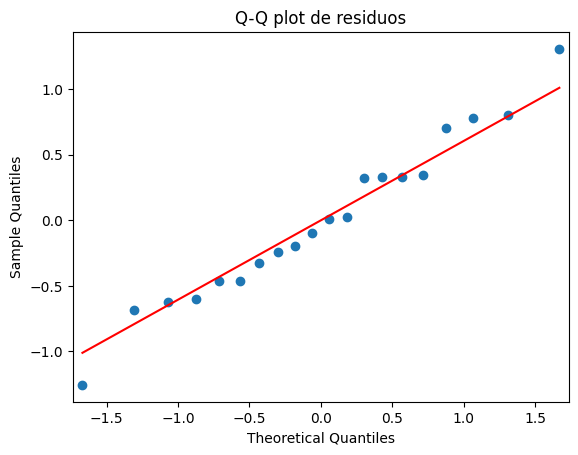

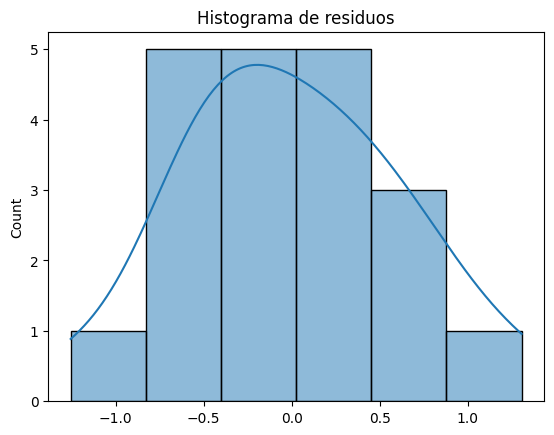

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Susana Escamilla

Este bloque realiza un ANOVA de una vía sobre la variable transformada con Box-Cox para comparar las medias entre los grupos. Se prueba si todas las medias son iguales (H0) frente a que al menos una difiere (H1). Los resultados de la tabla de ANOVA muestran si hay diferencias significativas entre los tratamientos según el valor-p.

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'con']['observaciones_boxcox']
grupo2 = df[df['tratamiento'] == 'sin']['observaciones_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Susana Escamilla

p-valor de Levene: 0.13842106091532835


Este bloque verifica la homogeneidad de varianzas de los grupos sobre la variable transformada con Box-Cox usando la prueba de Levene. Un valor-p > 0.05 indica que las varianzas son similares entre los grupos, mientras que un valor-p ≤ 0.05 sugiere diferencias significativas, lo cual es importante para validar los supuestos del ANOVA.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   con    sin    1.781   0.0 1.1812 2.3808   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

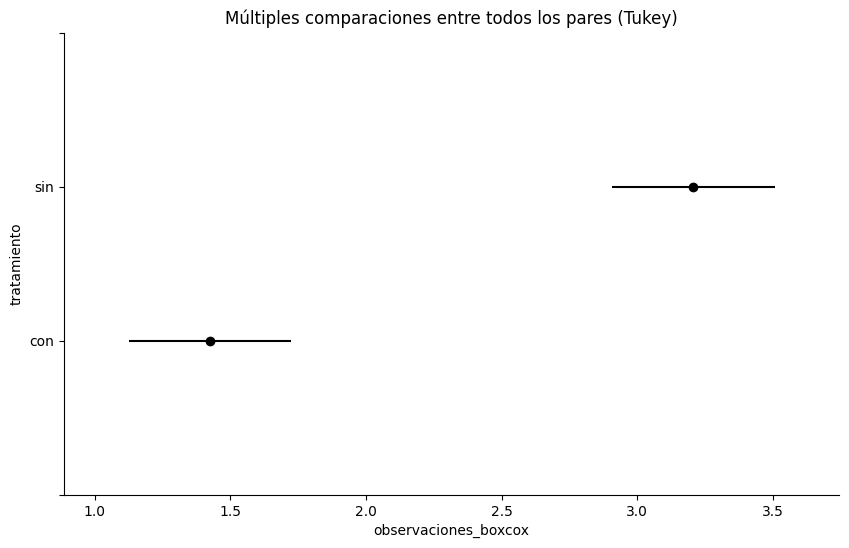

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['observaciones_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="observaciones_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Susana Escamilla

Conclusión:

El tratamiento de limpieza influye significativamente en la reducción de defectos y los resultados arrojados muestran que al aplicar el tratamiento disminuye de manera real el porcentaje de productos defectuosos por lo tanto el tratamiento si es efectivo.